In [18]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


Function Definition

In [ ]:
# Function to compress image
def compress_image(U, s, V, f):
    r = int(f * len(s))  # Compute the rank (number of singular values to retain)
    compressed_image = (U[:, :r] @ np.diag(s[:r]) @ V[:r, :]).astype(int)
    return compressed_image

**WORKING WITH GRAYSCALE**

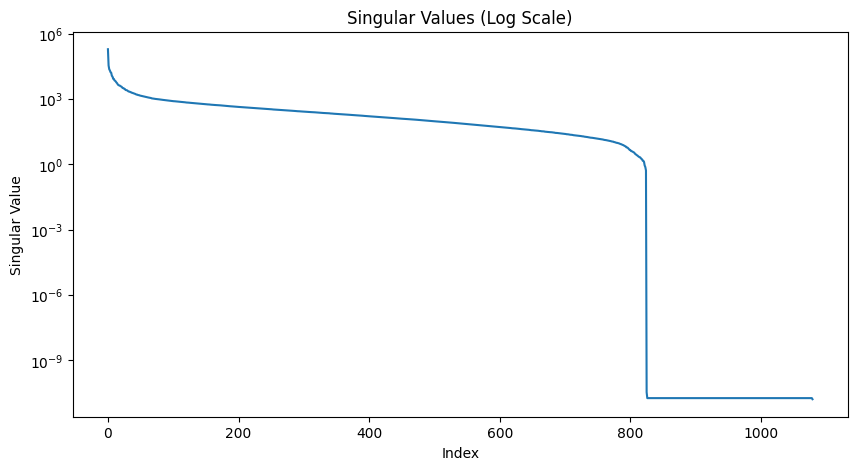

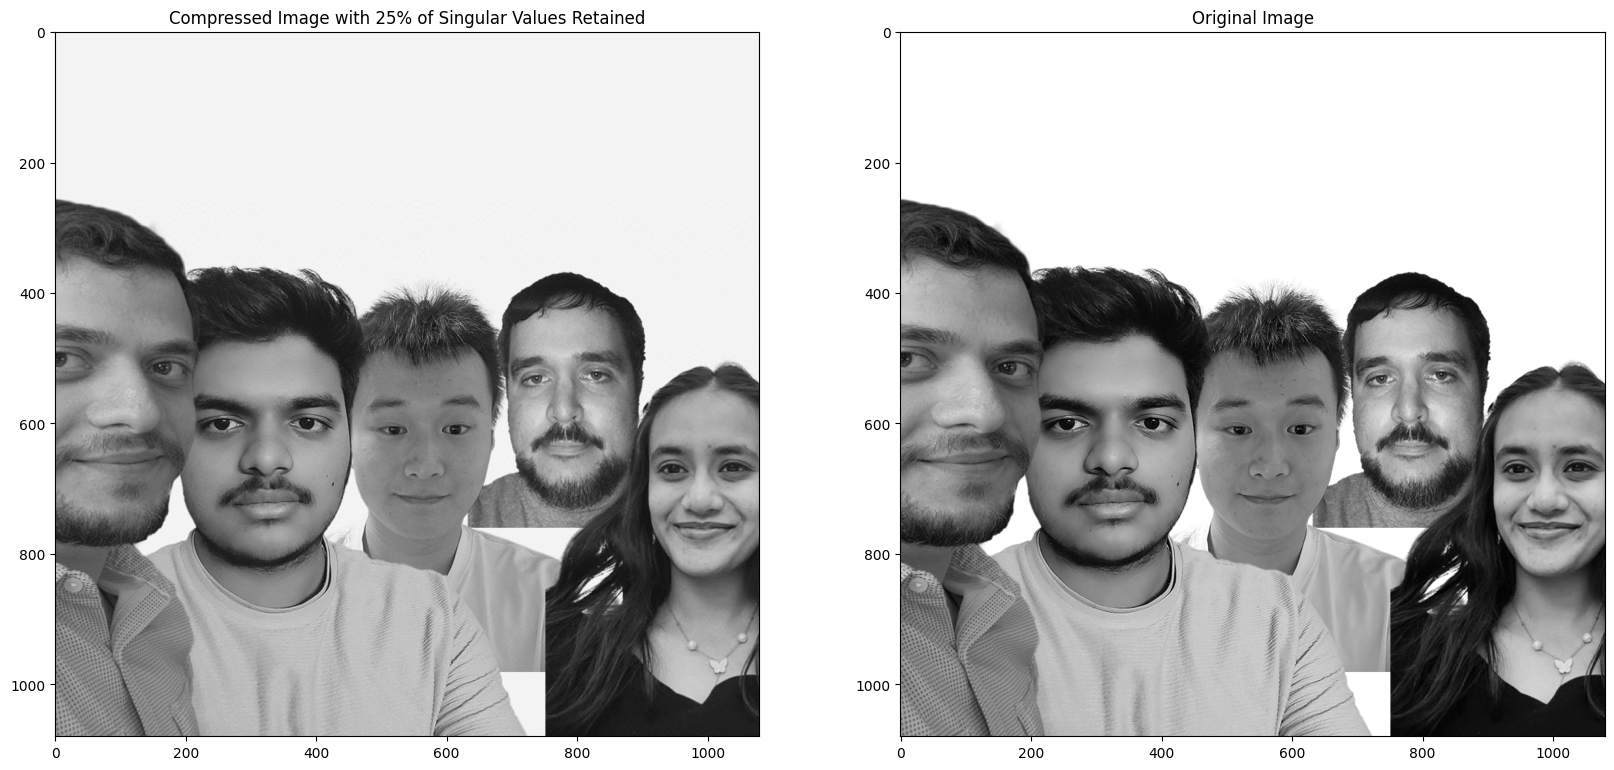

In [19]:
# Load the image
img = Image.open('HW1_Q3.png')
img_gray = img.convert('L')  # Convert to grayscale

# Convert to numpy array for processing
img_array = np.array(img_gray) # grayscale

# Perform SVD
U, s, V = np.linalg.svd(img_array, full_matrices=False)

# Example of compressing the image
compressed = compress_image(U, s, V, 0.25)  # Start by retaining 25% of the singular values

# Plot singular values on a log scale
plt.figure(figsize=(10, 5))
plt.semilogy(s) # Log Scale
plt.title('Singular Values (Log Scale)')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.show()

# Plot compressed and original image
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].set_title('Compressed Image with 25% of Singular Values Retained')
axes[0].imshow(compressed, cmap='gray')
axes[1].set_title('Original Image')
axes[1].imshow(img_array, cmap='gray')
plt.show()

# Continue to compress further and observe the changes visually

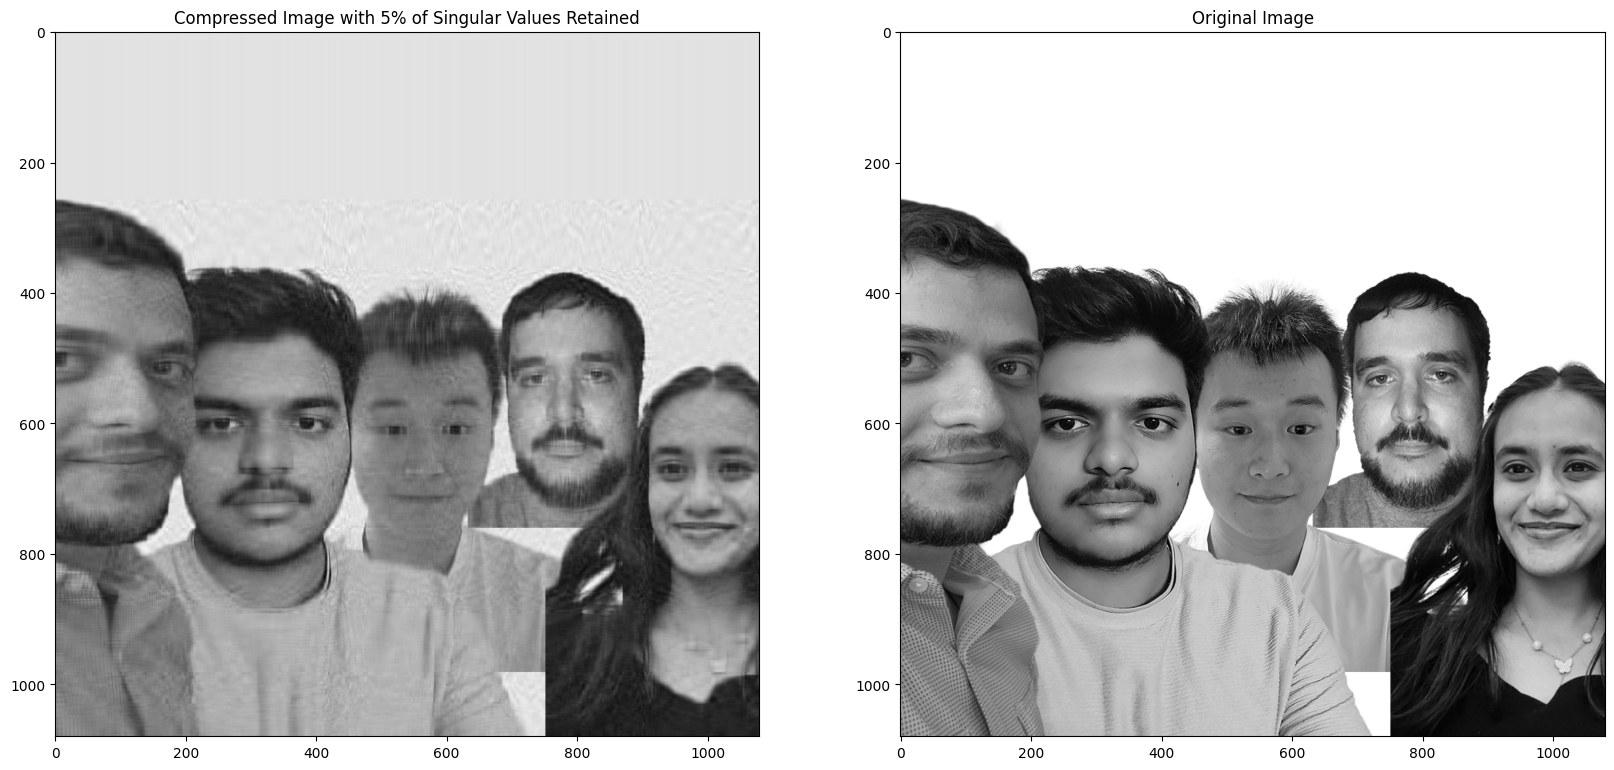

In [20]:
# Example of compressing the image
compressed = compress_image(U, s, V, 0.05)  # Start by retaining 25% of the singular values

# Plot compressed and original image
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].set_title('Compressed Image with 5% of Singular Values Retained')
axes[0].imshow(compressed, cmap='gray')
axes[1].set_title('Original Image')
axes[1].imshow(img_array, cmap='gray')
plt.show()

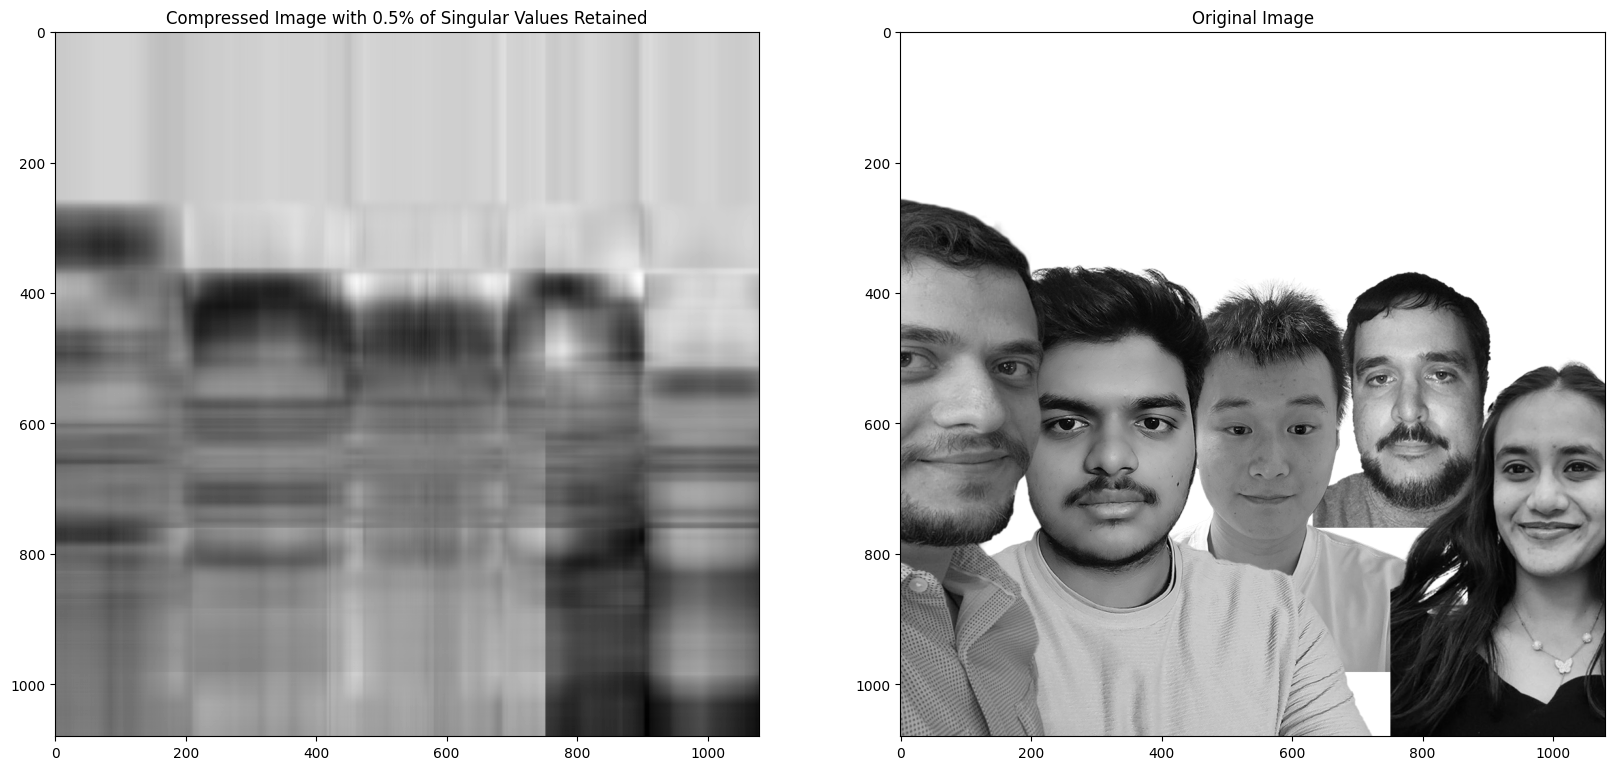

In [22]:
# Example of compressing the image
compressed = compress_image(U, s, V, 0.005)  # Start by retaining 25% of the singular values

# # Plot singular values on a log scale
# plt.figure(figsize=(10, 5))
# plt.semilogy(s) # Log Scale
# plt.title('Singular Values (Log Scale)')
# plt.xlabel('Index')
# plt.ylabel('Singular Value')
# plt.show()

# Plot compressed and original image
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].set_title('Compressed Image with 0.5% of Singular Values Retained')
axes[0].imshow(compressed, cmap='gray')
axes[1].set_title('Original Image')
axes[1].imshow(img_array, cmap='gray')
plt.show()

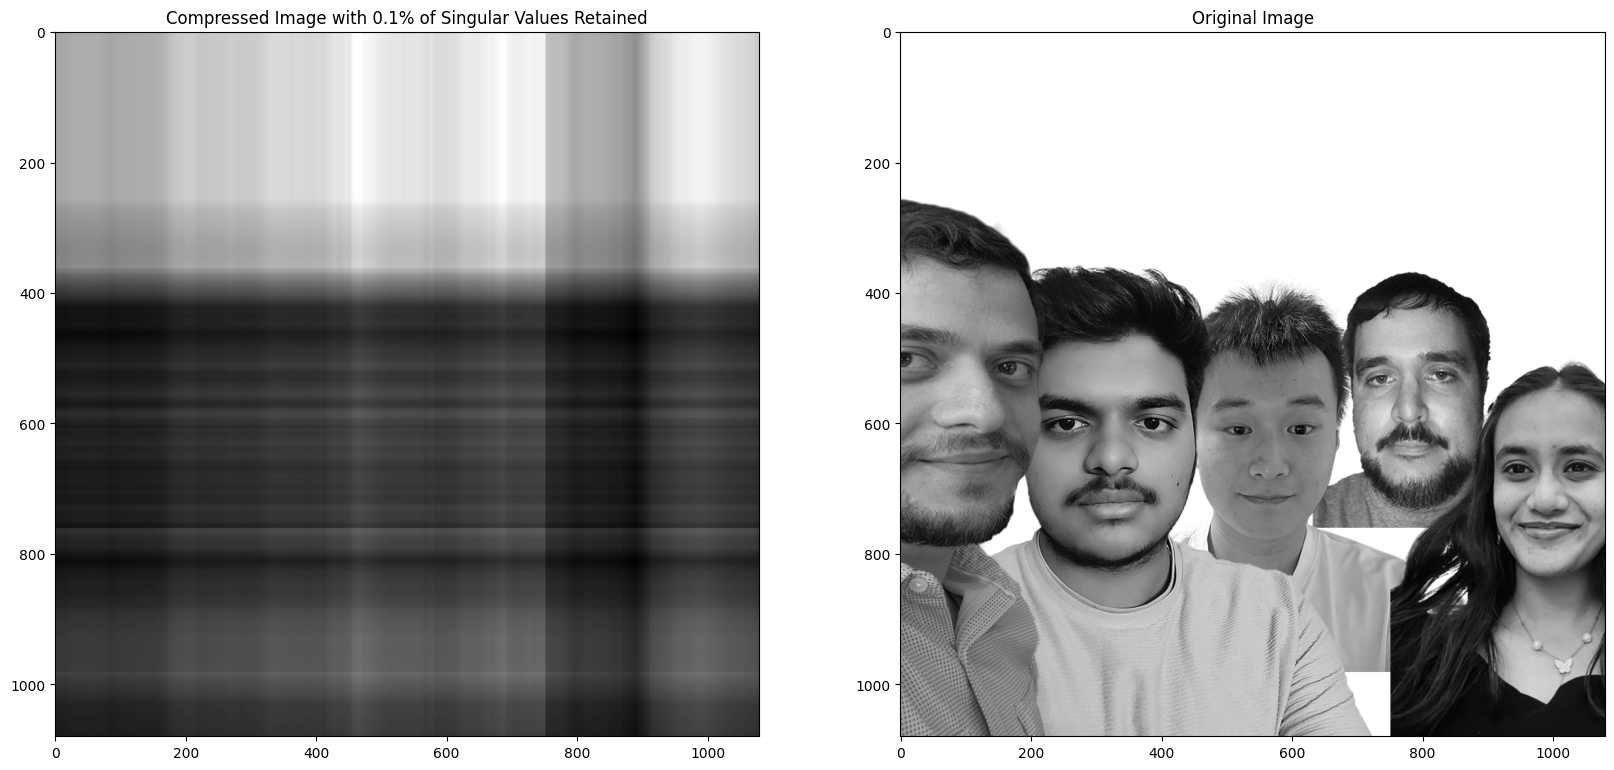

In [23]:
# Example of compressing the image
compressed = compress_image(U, s, V, 0.001)  # Start by retaining 25% of the singular values

# # Plot singular values on a log scale
# plt.figure(figsize=(10, 5))
# plt.semilogy(s) # Log Scale
# plt.title('Singular Values (Log Scale)')
# plt.xlabel('Index')
# plt.ylabel('Singular Value')
# plt.show()

# Plot compressed and original image
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].set_title('Compressed Image with 0.1% of Singular Values Retained')
axes[0].imshow(compressed, cmap='gray')
axes[1].set_title('Original Image')
axes[1].imshow(img_array, cmap='gray')
plt.show()

**WORKING WITH RGB**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


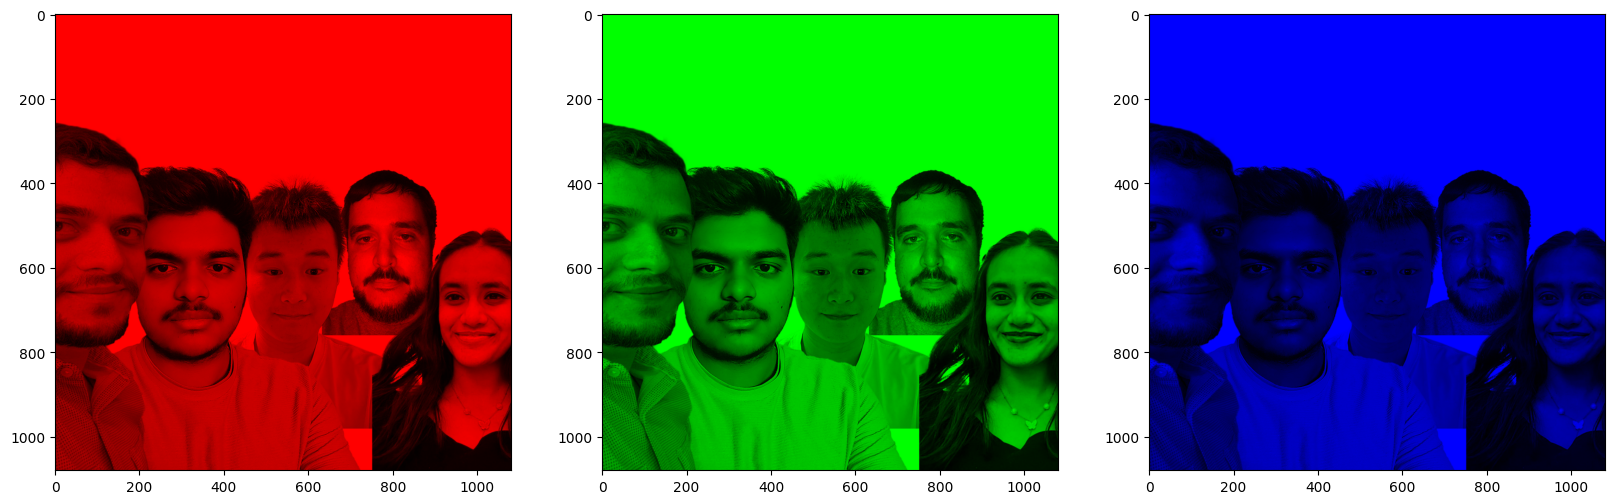

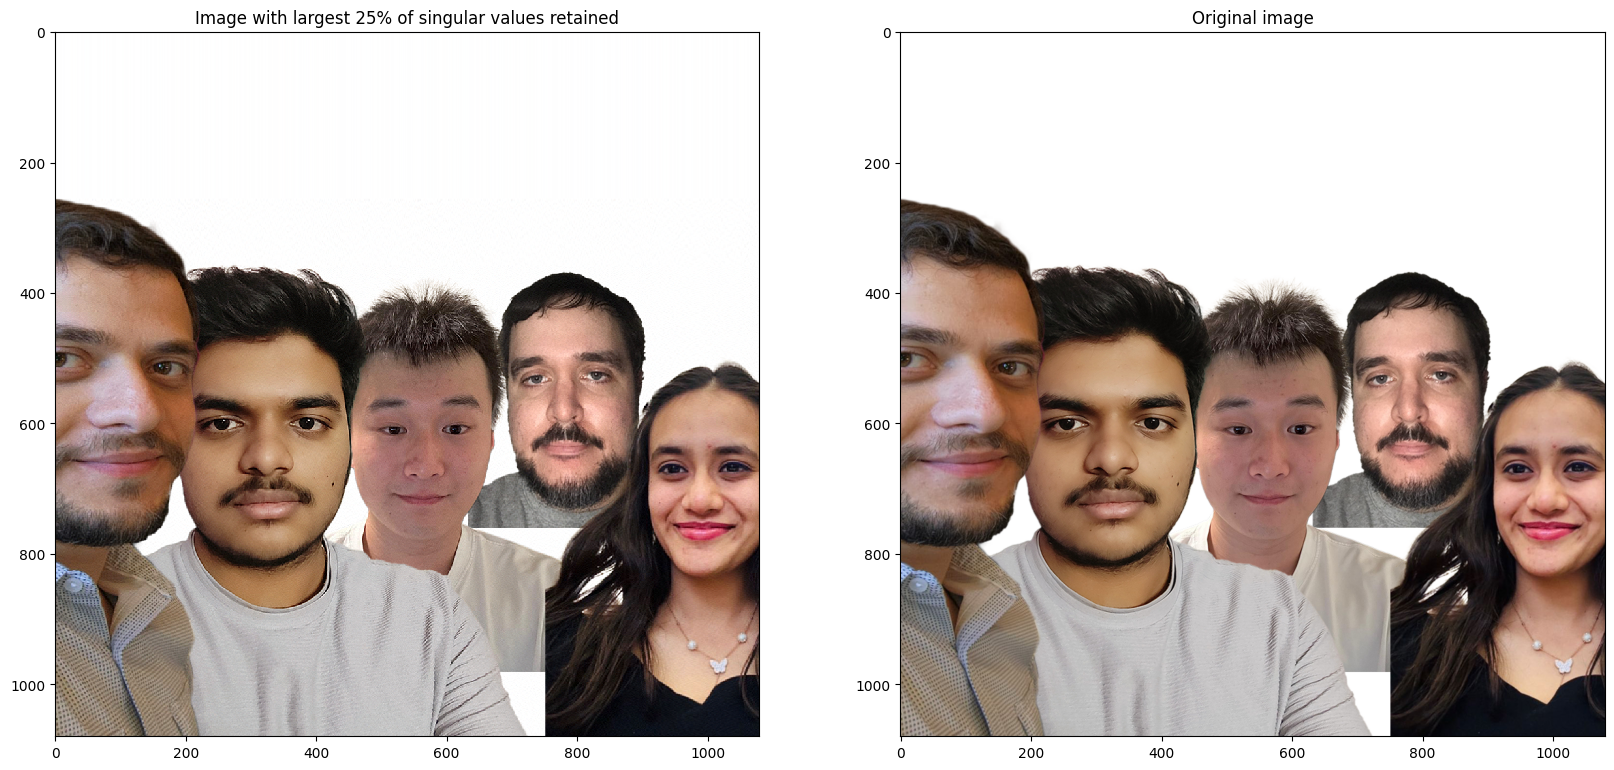

In [30]:
img_colour = Image.open('HW1_Q3.png')
img_colour = img_colour.convert('RGB')
# Display red, green and blue channels by zeroing other channels
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 20/1.77))
img_array = np.array(img_colour)

# Zero the g/b channels: RED
red = img_array.copy()
red[:,:,(1,2)] = 0.0
axes[0].imshow(red);

# Zero the r/b channels: GREEN
green = img_array.copy()
green[:,:,(0,2)] = 0.0
axes[1].imshow(green);

# Zero the r/g channels: BLUE
blue = img_array.copy()
blue[:,:,(0,1)] = 0.0
axes[2].imshow(blue);

# Compute SVD for each colour
U, s, V = [0]*3, [0]*3, [0]*3
for i in range(3):
    U[i], s[i], V[i] = np.linalg.svd(img_array[:, :, i], full_matrices=False)
    
# Compress each colour separately
compressed = [compress_image(U[i], s[i], V[i], 0.25) for i in range(3)]
# Reconstruct 3D RGB array and filter any values outside of (0, 1)
compressed = np.dstack(compressed)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20/1.77))
axes[0].set_title('Image with largest 25% of singular values retained')
axes[0].imshow(compressed, interpolation="nearest");
axes[1].set_title('Original image')
axes[1].imshow(img_colour);
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


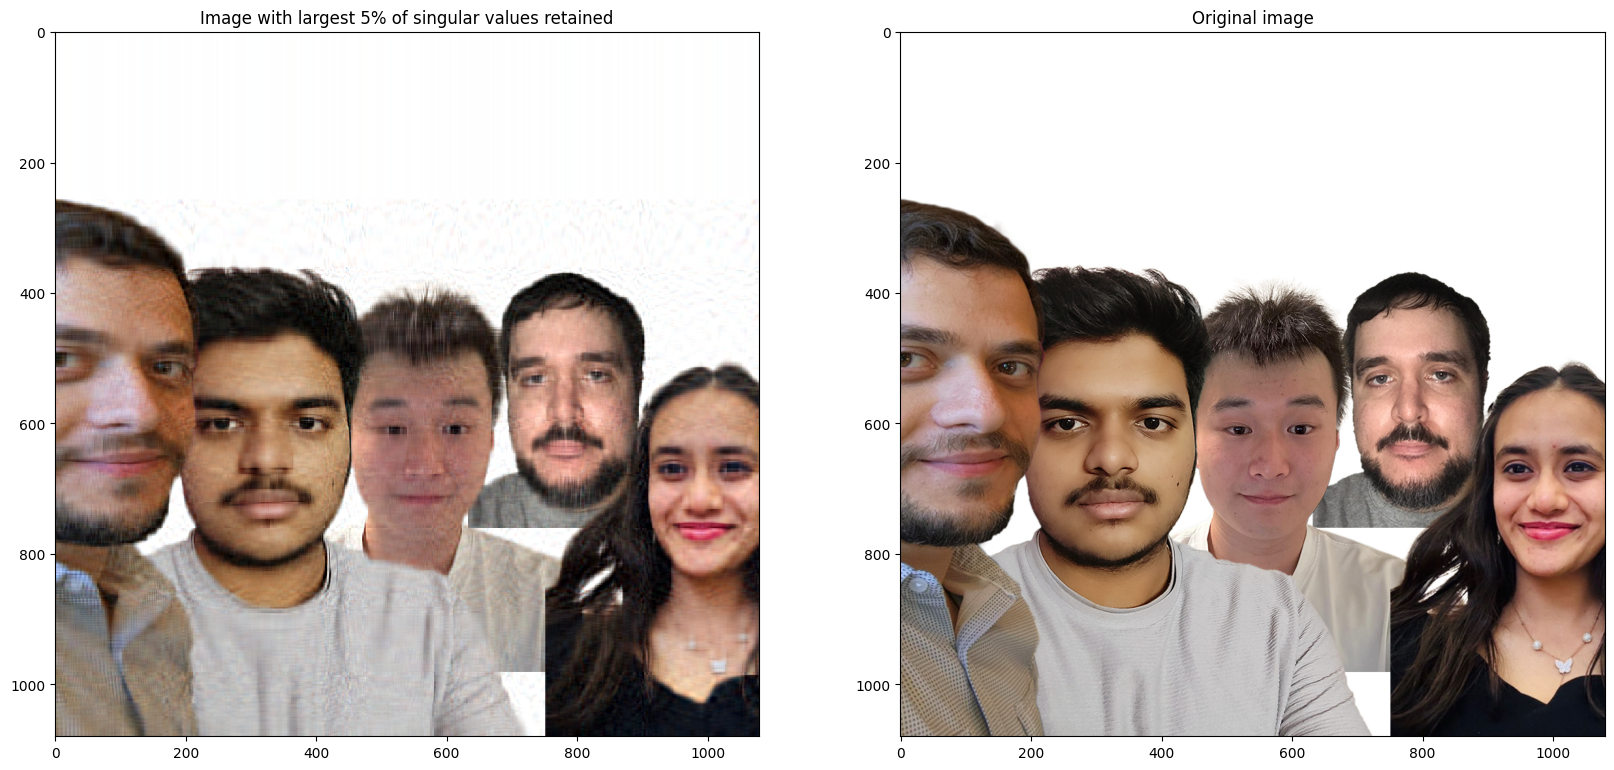

In [26]:
# Compress each colour separately
compressed = [compress_image(U[i], s[i], V[i], 0.05) for i in range(3)]
# Reconstruct 3D RGB array and filter any values outside of (0, 1)
compressed = np.dstack(compressed)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20/1.77))
axes[0].set_title('Image with largest 5% of singular values retained')
axes[0].imshow(compressed, interpolation="nearest");
axes[1].set_title('Original image')
axes[1].imshow(img_colour);
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


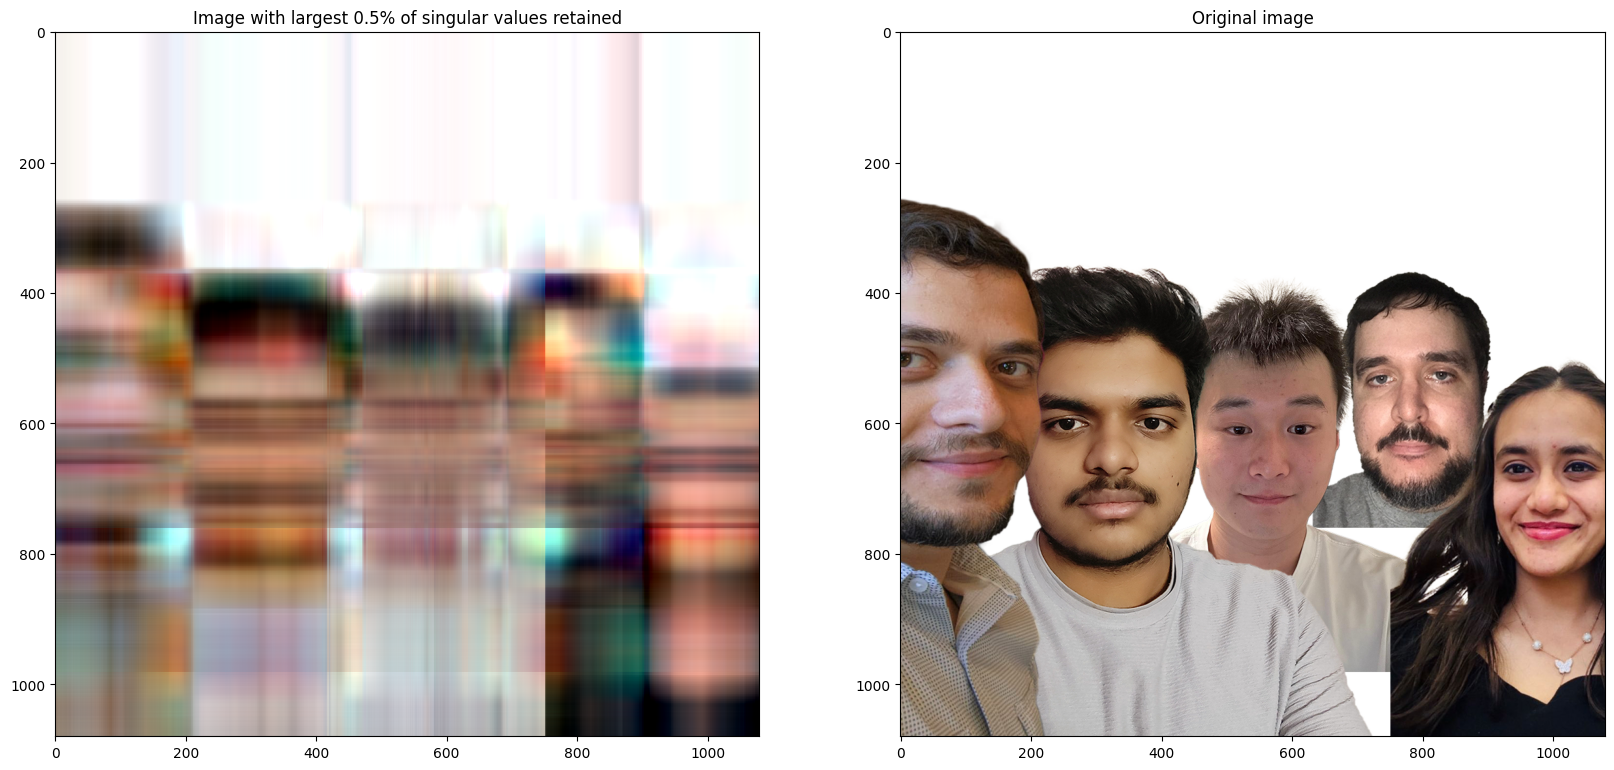

In [27]:
# Compress each colour separately
compressed = [compress_image(U[i], s[i], V[i], 0.005) for i in range(3)]
# Reconstruct 3D RGB array and filter any values outside of (0, 1)
compressed = np.dstack(compressed)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20/1.77))
axes[0].set_title('Image with largest 0.5% of singular values retained')
axes[0].imshow(compressed, interpolation="nearest");
axes[1].set_title('Original image')
axes[1].imshow(img_colour);
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


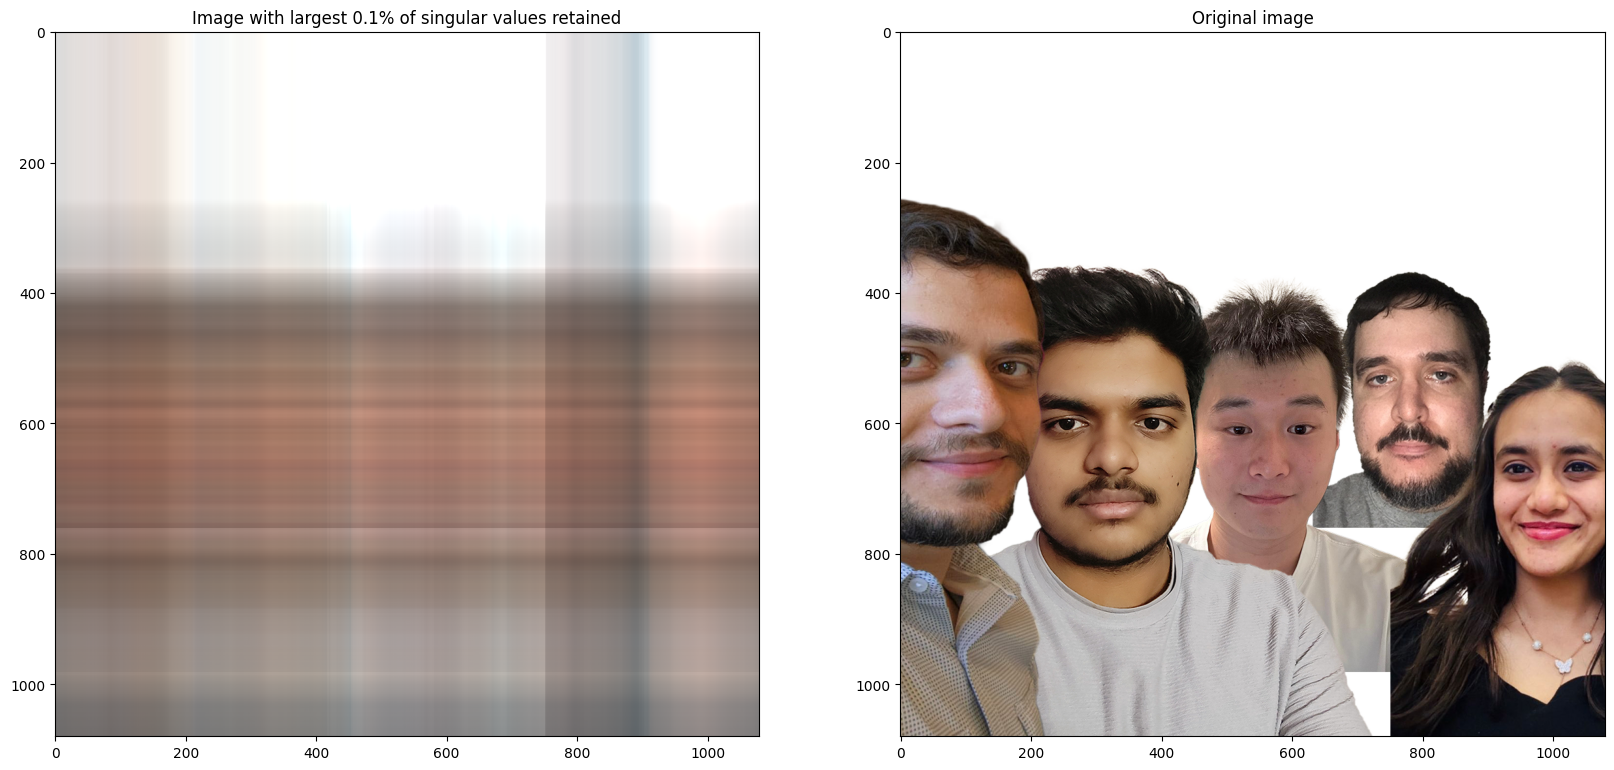

In [28]:
# Compress each colour separately
compressed = [compress_image(U[i], s[i], V[i], 0.001) for i in range(3)]
# Reconstruct 3D RGB array and filter any values outside of (0, 1)
compressed = np.dstack(compressed)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20/1.77))
axes[0].set_title('Image with largest 0.1% of singular values retained')
axes[0].imshow(compressed, interpolation="nearest");
axes[1].set_title('Original image')
axes[1].imshow(img_colour);
plt.show()